In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt= pd.read_excel('variables e indices NDEFM.xlsx',usecols=['humedad esp (g/kg)','año', 'omega (Pa/s)','indice SOI','indice SAM '])

In [3]:
dt.rename(columns={'humedad esp (g/kg)':'humedad','omega (Pa/s)':'velocidad', 'indice SOI':'indice_oscSur', 'indice SAM ':'indice_marshall'},inplace=True)

In [4]:
dt.head(2)

,año,humedad,velocidad,indice_oscSur,indice_marshall
0,1949,8.7958,0.002598,NaN,NaN
1,1950,10.6268,-0.022770,NaN,NaN


In [5]:
dt.dropna(inplace=True)

In [6]:
df = pd.read_excel(io ='Estaciones.xlsx', sheet_name="Anuales",usecols=['Unnamed: 0','Unnamed: 13'])

In [7]:
df

,Unnamed: 0,Unnamed: 13
0,Año hid,San Luis Tucuman
1,1946,NaN
2,1947,NaN
3,1948,NaN
4,1949,NaN
...,...,...
56,2001,1334
57,2002,938
58,2003,849
59,2004,825


In [8]:
df.rename(columns={'Unnamed: 0':'año', 'Unnamed: 13':'precipitacionAnual_sanLuis_Tucuman'},inplace=True)

In [9]:
df.drop([0],axis=0,inplace=True)

In [10]:
df.dropna(inplace=True)
df.head(2)

,año,precipitacionAnual_sanLuis_Tucuman
28,1973,1287
29,1974,1376


In [11]:
merge =df.merge(dt)

In [12]:
merge.head(5)

,año,precipitacionAnual_sanLuis_Tucuman,humedad,velocidad,indice_oscSur,indice_marshall
0,1973,1287,11.0576,-0.013850,-0.52,0.524
1,1974,1376,10.1904,-0.018322,2.26,1.488
2,1975,852.5,10.3370,-0.016138,0.40,-1.748
3,1976,1140,10.1952,-0.014858,1.62,0.042
4,1977,1034,10.5296,-0.011090,0.14,-2.460


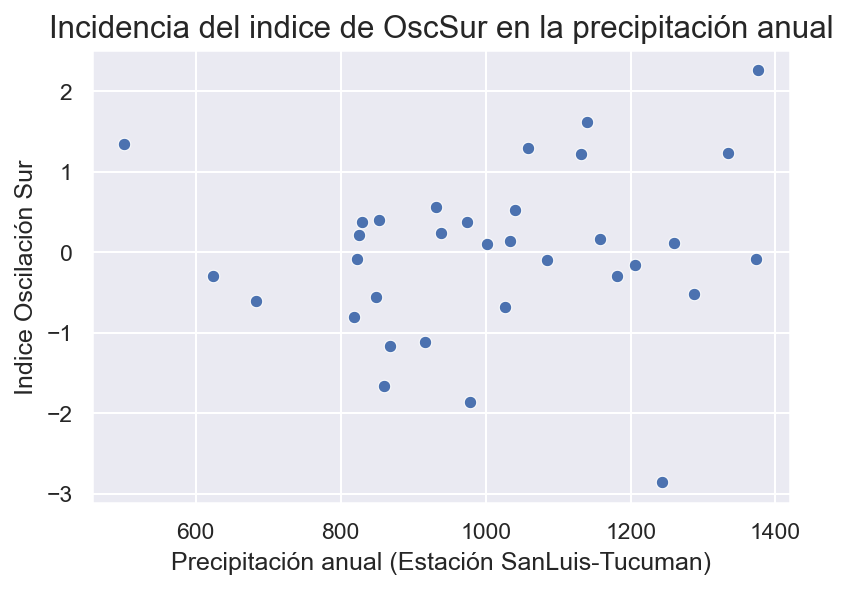

In [16]:
sns.set(rc={"figure.dpi":150})
ax=sns.scatterplot(data=merge, x="precipitacionAnual_sanLuis_Tucuman", y="indice_oscSur",palette="mako")
#efecto niño: menos lluvia y el indice osc negativo, niña al reves
ax.set_title("Incidencia del indice de OscSur en la precipitación anual",size =15)
ax.set_xlabel("Precipitación anual (Estación SanLuis-Tucuman)", fontsize = 12)
ax.set_ylabel("Indice Oscilación Sur", fontsize = 12)
fig = ax.get_figure()
fig.savefig("regresionOscSur.png")